In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Customer Shopping/shopping_trends.csv")


In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.shape

(3900, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

## Churn Prediction (Classification):

### This is a classification problem where the goal is to predict if a customer will make repeat purchases or "churn" (stop buying)


In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from pycaret.classification import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [36]:
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Payment Method'] = label_encoder.fit_transform(df['Payment Method'])
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Color'] = label_encoder.fit_transform(df['Color'])
df['Size'] = label_encoder.fit_transform(df['Size'])
df['Frequency of Purchases'] = label_encoder.fit_transform(df['Frequency of Purchases'])
df['Promo Code Used'] = label_encoder.fit_transform(df['Promo Code Used'])
df['Previous Purchases']=label_encoder.fit_transform(df['Previous Purchases'])
df['Discount Applied']=label_encoder.fit_transform(df['Discount Applied'])

In [40]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,1,Blouse,1,53,16,0,7,3,3.1,Yes,2,Express,1,1,13,Venmo,3
1,2,19,1,Sweater,1,64,18,0,12,3,3.1,Yes,0,Express,1,1,1,Cash,3
2,3,50,1,Jeans,1,73,20,2,12,1,3.1,Yes,1,Free Shipping,1,1,22,Credit Card,6
3,4,21,1,Sandals,2,90,38,1,12,1,3.5,Yes,4,Next Day Air,1,1,48,PayPal,6
4,5,45,1,Blouse,1,49,36,1,21,1,2.7,Yes,1,Free Shipping,1,1,30,PayPal,0


In [53]:
X = df[['Age','Location','Gender','Previous Purchases','Promo Code Used','Category','Discount Applied']]
y = df['Frequency of Purchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
#fit model
object = StandardScaler()

X_train = object.fit_transform(X_train)
X_test = object.fit_transform(X_test)

In [49]:
s = setup(data = df[['Age','Location','Gender','Previous Purchases','Promo Code Used','Category','Discount Applied', 'Frequency of Purchases']],  # Include the target column here
          target = 'Frequency of Purchases',
          session_id=123)
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,Frequency of Purchases
2,Target type,Multiclass
3,Original data shape,"(3900, 8)"
4,Transformed data shape,"(3900, 8)"
5,Transformed train set shape,"(2730, 8)"
6,Transformed test set shape,"(1170, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.1520,0.5052,0.1520,0.1524,0.1513,0.0105,0.0106,0.0760
dummy,Dummy Classifier,0.1498,0.5000,0.1498,0.0224,0.0390,0.0000,0.0000,0.0560
xgboost,Extreme Gradient Boosting,0.1491,0.5085,0.1491,0.1496,0.1484,0.0070,0.0070,0.3660
ada,Ada Boost Classifier,0.1476,0.0000,0.1476,0.1478,0.1451,0.0047,0.0048,0.1730
lightgbm,Light Gradient Boosting Machine,0.1451,0.5073,0.1451,0.1454,0.1445,0.0024,0.0024,3.7370
lr,Logistic Regression,0.1447,0.0000,0.1447,0.1424,0.1316,0.0009,0.0009,0.6860
lda,Linear Discriminant Analysis,0.1436,0.0000,0.1436,0.1411,0.1306,-0.0004,-0.0004,0.0340
ridge,Ridge Classifier,0.1432,0.0000,0.1432,0.1389,0.1280,-0.0009,-0.0010,0.0350
nb,Naive Bayes,0.1429,0.4874,0.1429,0.1466,0.1328,-0.0012,-0.0013,0.0620
svm,SVM - Linear Kernel,0.1429,0.0000,0.1429,0.0556,0.0629,-0.0005,0.0016,0.2640


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [55]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=1, splitter='best')

In [59]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

# Instead of using coef_, you can access feature importance using:
print('Feature Importance:', reg.feature_importances_)
print('Variance score: {}'.format(reg.score(X_train, y_train)))

Feature Importance: [0.28954446 0.29342247 0.03833528 0.24875134 0.02164187 0.08724118
 0.0210634 ]
Variance score: 0.8439554117869537


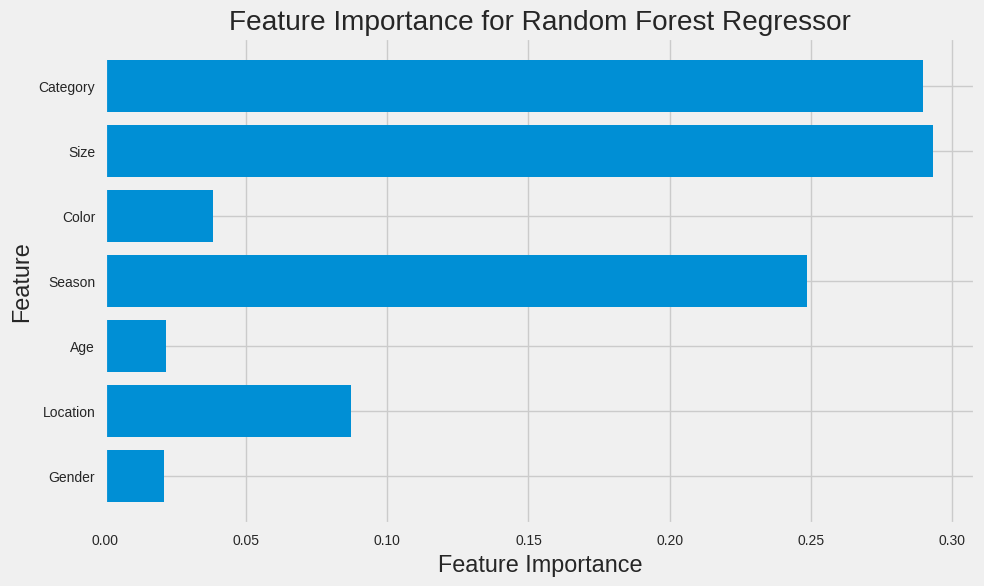

In [61]:
# prompt: #Use a bar chart to visualize the most important features for tree-based models like Random Forest

import matplotlib.pyplot as plt

# Assuming 'reg' is your trained RandomForestRegressor model and X_train is your training features
feature_importances = reg.feature_importances_
feature_names = ['Category','Size','Color','Season','Age','Location','Gender'] # Replace with your actual feature names


# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Random Forest Regressor")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()